<a href="https://colab.research.google.com/github/Rishikesh623/Data_Mining/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
iris = datasets.load_iris()
X = iris.data

In [10]:
def distance_matrix(X):
    N = X.shape[0]
    distance_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance_matrix[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))
    return distance_matrix

In [12]:
distance_mat = distance_matrix(X)
print(distance_mat)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


In [23]:
# @title Implement K-means
def kmeans(X, K, max_iters=80):

    # choose centroids
    np.random.seed(42)
    rand_pos = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[rand_pos]

    for _ in range(max_iters):
        clusters = []
        for i in range(K):
          clusters.append([])

        for idx, vector in enumerate(X):
            distances = []
            for centroid in centroids:
                distances.append(np.sqrt(np.sum((vector-centroid)**2)))

            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)

        updated_centroids = []
        for cluster in clusters:
            if cluster:
                cluster_mean = np.mean(X[cluster],axis=0)
                updated_centroids.append(cluster_mean)
            else:
                rand_pos = np.random.choice(X.shape[0])
                updated_centroids.append(X[rand_pos])

        updated_centroids = np.array(updated_centroids)

        if np.allclose(centroids, updated_centroids):
            break
        else:
          centroids = updated_centroids

    labels = np.zeros(X.shape[0])
    for idx, vector in enumerate(X):
        distances = []
        for centroid in centroids:
            distances.append(np.sqrt(np.sum((vector-centroid)**2)))
        cluster_idx = np.argmin(distances)
        labels[idx] = cluster_idx

    return labels

In [24]:
labels = kmeans(X,3)#for iris 3 classes

In [25]:
print(np.unique(labels))

[0. 1. 2.]


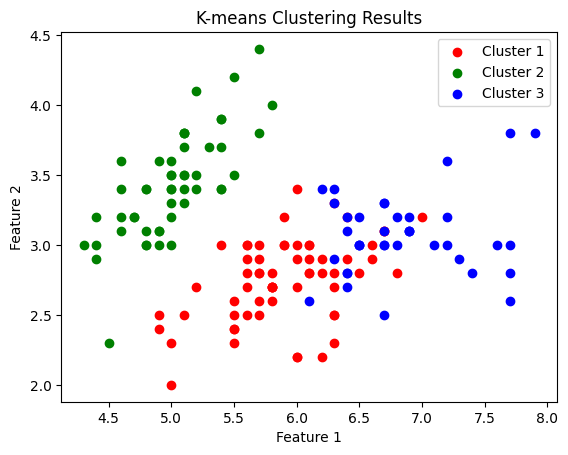

In [26]:
colors = ['r', 'g', 'b']
for k in range(3):
    cluster_points = X[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}',c=colors[k])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()

In [28]:
#genreal function
def plot_clusters(X, labels):
    colors = ['red', 'green', 'blue', 'black', 'purple']
    markers = ['o', 's', '^', 'D', 'x']
    K = len(np.unique(labels))

    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=colors[k % len(colors)],
                    marker=markers[k % len(markers)],
                    label=f'Cluster {k+1}')

    plt.title("K-Means Clustering on Iris Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

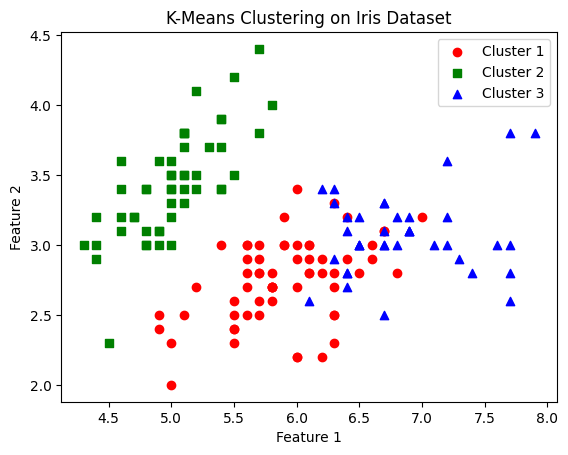

In [29]:
plot_clusters(X, labels)

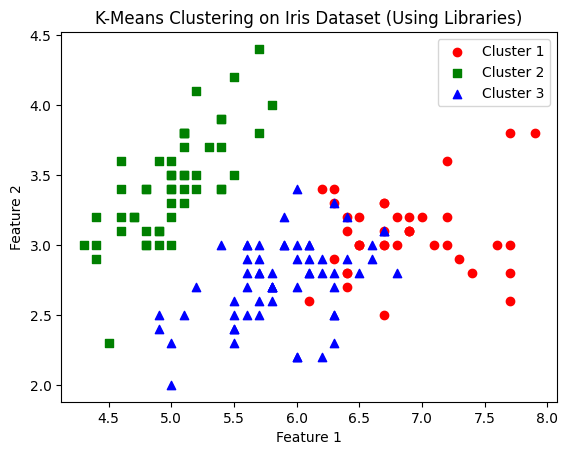

In [2]:
# @title Using Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data

# A. Compute Euclidean distance matrix using scipy
def compute_distance_matrix(X):
    return distance_matrix(X, X)

# B. K-means clustering using sklearn
def kmeans_clustering(X, K):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels

# C. Plotting function
def plot_clusters(X, labels):
    colors = ['red', 'green', 'blue', 'yellow', 'purple']
    markers = ['o', 's', '^', 'D', 'x']
    K = len(np.unique(labels))

    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=colors[k % len(colors)],
                    marker=markers[k % len(markers)],
                    label=f'Cluster {k+1}')

    plt.title("K-Means Clustering on Iris Dataset (Using Libraries)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


K = 3  # Number of clusters
labels = kmeans_clustering(X, K)
plot_clusters(X, labels)
